# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
import warnings
warnings.filterwarnings('ignore') #OPTIONAL - included to ignore the warnings from the monte carlo simulations


In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


In [3]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()


True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2 #This number may be changed to accomodate another holding amount
eth_coins = 5.3 #This number may be changed to accomodate another holding amount


#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000 #This number may be changed to accomodate another monthly income


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json() #Use requests.get function and call the endpoint url

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=2, sort_keys=True)) #Will return the data set in a dictionary


{
  "data": {
    "1": {
      "circulating_supply": 19026831,
      "id": 1,
      "last_updated": 1651351500,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 730690163413,
          "percent_change_1h": -0.141481903459288,
          "percent_change_24h": -0.512372560290403,
          "percent_change_7d": -3.47245557722667,
          "percentage_change_1h": -0.141481903459288,
          "percentage_change_24h": -0.512372560290403,
          "percentage_change_7d": -3.47245557722667,
          "price": 38376.0,
          "volume_24h": 18575523732
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19026831,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3106,
    "timestamp": 1651351500
  }
}


In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json() #Use requests.get function and call the endpoint url

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=2, sort_keys=True)) #Will return the data set in a dictionary


{
  "data": {
    "1027": {
      "circulating_supply": 120593631,
      "id": 1027,
      "last_updated": 1651351402,
      "max_supply": 0,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 337328823866,
          "percent_change_1h": -0.0264569913864394,
          "percent_change_24h": -0.446426135571505,
          "percent_change_7d": -5.70351685010638,
          "percentage_change_1h": -0.0264569913864394,
          "percentage_change_24h": -0.446426135571505,
          "percentage_change_7d": -5.70351685010638,
          "price": 2797.86,
          "volume_24h": 11151912016
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 120593631,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3106,
    "timestamp": 1651351402
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"] #Assign to new variable

# Print the current price of BTC
print(f"The current price of BTC is ${btc_price:.2f}")


The current price of BTC is $38376.00


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"] #Assign to new variable

# Print the current price of ETH
print(f"The current price of BTC is ${eth_price:.2f}")


The current price of BTC is $2797.86


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price #Multiply the BTC coin amount held by the BTC price and assign to new variable

# Print current value of your holding in BTC
print(f"The current value of the BTC holding is ${btc_value:.2f}")


The current value of the BTC holding is $46051.20


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price #Multiply the ETH coin amount held by the ETH price and assign to new variable

# Print current value of your holding in ETH
print(f"The current value of the ETH holding is ${eth_value:.2f}")


The current value of the ETH holding is $14828.66


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding and assign to new variable 
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The total current value of the cryptocurrency wallet is ${total_crypto_wallet:.2f}")


The total current value of the cryptocurrency wallet is $60879.86


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110 #This number may be changed to accomodate another holding amount
agg_shares = 200 #This number may be changed to accomodate another holding amount


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY") #Use os.getenv function and call ("whatever you named your api key in your env file") - mine is called "ALPACA_API_KEY"
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY") #Use os.getenv function and call ("whatever you named your api secret key in your env file") - mine is called "ALPACA_SECRET_KEY"

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
#Use parameters alpaca_api_key, alpaca_secret_key, api_version="v2"


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"] #Tickers may be changed to accommodate different stock/bond holdings

# Set timeframe to 1Day
timeframe = "1Day"

# Set your start/end time or set a today time using pd.Timestamp with your selcted date and timezone - tz=
# Format current date as ISO format
today = pd.Timestamp('2022-04-15', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio and assign to new variable
# Be sure to set the `df` property after the function to format the response object as a DataFrame
spyagg_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=today
).df

# Reorganize the DataFrame by separating ticker data
AGG = spyagg_prices_df[spyagg_prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = spyagg_prices_df[spyagg_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames using the pd.concat function
spyagg_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Review the first 5 rows of the Alpaca DataFrame
spyagg_prices_df.head()


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2022-04-18 04:00:00+00:00  436.73  439.7500  435.61  437.97   65814949   
2022-04-19 04:00:00+00:00  437.87  445.8000  437.68  445.04   77678099   
2022-04-20 04:00:00+00:00  446.95  447.5700  443.48  444.71   64737457   
2022-04-21 04:00:00+00:00  448.58  450.0100  437.10  438.06   85097110   
2022-04-22 04:00:00+00:00  436.94  438.0825  425.44  426.04  132156403   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-04-18 04:00:00+00:00      573478  437.862483  103.97  104.0150  103.610   
2022-04-19 04:00:00+00:00      597840  443.072191  103.26  103.4264  102.974   
2022-04-20 04:00:00+00:00      591762  445.610168  103.36  103.7356  103.300   
2022-04-21 04:00:00+00:00      719682  442.772969  103.44  103.4700  102.790   
2022-04-22 04:00:00+00:00      972064  429.813156  102.73  103.1800  102.670   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-18 04:00:00+00:00  103.65   8630794       35583  103.732544  
2022-04-19 04:00:00+00:00  103.02   7845969       32656  103.193615  
2022-04-20 04:00:00+00:00  103.61   8434303       32866  103.528935  
2022-04-21 04:00:00+00:00  103.04  11393860       35595  103.047589  
2022-04-22 04:00:00+00:00  102.94   9152665       31498  102.925863

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Convert the value to a floating point number and assign to a new variable
agg_close_price = float(spyagg_prices_df["AGG"]["close"][-1]) #In this case I chose to select the last price using [-1] but you can also select the first price using [0]

# Print the AGG closing price
print(f"The AGG closing price is ${agg_close_price:.2f}")


The AGG closing price is $102.87


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Convert the value to a floating point number and assign to a new variable
spy_close_price = float(spyagg_prices_df["SPY"]["close"][-1])  #In this case I chose to select the last price using [-1] but you can also select the first price using [0]

# Print the SPY closing price
print(f"The SPY closing price is ${spy_close_price:.2f}")


The SPY closing price is $412.00


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price #Multiply the number of AGG shares by the AGG closing price and assign to new variable

# Print the current value of the bond portfolio
print(f"The current value of the AGG bond holding is ${agg_value:.2f}")


The current value of the AGG bond holding is $20574.00


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price #Multiply the number of SPY shares by the SPY closing price and assign to new variable

# Print the current value of the stock portfolio
print(f"The current value of the SPY stock holding is ${spy_value:.2f}")


The current value of the SPY stock holding is $45320.00


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value #Add the AGG value and the SPY value and assign to new variable

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}")


The current balance of the stock and bond portion of the portfolio is $65894.00


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds and assign to a new variable
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"The total current cryptocurrency wallet balance is ${total_portfolio:.2f}")


The total current cryptocurrency wallet balance is $126773.86


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds] #Create a list called savings_data containing the total_crypto_wallet value and the total_stocks_bonds value

# Review the Python list savings_data
savings_data


[60879.85799999999, 65894.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df using the pd.DataFrame function
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stock/bond"]) #Use parameters - savings_data (list created), colums, and index

# Display the savings_df DataFrame
savings_df


,amount
crypto,60879.858
stock/bond,65894.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Savings Portfolio'}, ylabel='amount'>

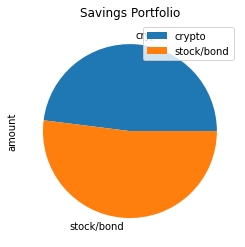

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title="Savings Portfolio") #Use the plot.pie function and add y-axis and title


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3 #If higher/lower emergency fund desired, the 3 value may be changed


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions using the if/elif/else statements
if total_portfolio > emergency_fund_value:
    print("Congrats! You have enough money in this fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations for reaching an important financial goal.")
else:
    print(f"You still need to save{emergency_fund_value - total_portfolio} to reach your goal.")


Congrats! You have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Use pd.Timestamp with your selcted date and timezone - tz="" and format current date as ISO format
start_date1 = pd.Timestamp("2019-04-15", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2022-04-15", tz="America/New_York").isoformat()


In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
pricing_data_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date1,
    end=end_date1,
).df
    

# Reorganize the DataFrame and separate ticker data
AGG = pricing_data_df[pricing_data_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = pricing_data_df[pricing_data_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame using the display function
display(df_stock_data.head()) #First five use the head function
display(df_stock_data.tail()) #Last five use the tail function

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-04-15 04:00:00+00:00  108.21  108.3000  108.21  108.25  2546204   
2019-04-16 04:00:00+00:00  108.12  108.2100  108.02  108.06  4093950   
2019-04-17 04:00:00+00:00  108.09  108.1899  108.05  108.05  3390171   
2019-04-18 04:00:00+00:00  108.23  108.2900  108.16  108.19  2217221   
2019-04-22 04:00:00+00:00  108.13  108.1600  108.05  108.06  5725616   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2019-04-15 04:00:00+00:00       10053  108.253507  290.27  290.350  289.075   
2019-04-16 04:00:00+00:00       12649  108.108731  290.96  291.010  289.500   
2019-04-17 04:00:00+00:00        9569  108.090758  291.41  291.425  288.990   
2019-04-18 04:00:00+00:00        8388  108.211849  290.12  290.320  288.660   
2019-04-22 04:00:00+00:00        9161  108.098893  289.17  290.435  289.070   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-04-15 04:00:00+00:00  289.97  50222730      199622  289.773677  
2019-04-16 04:00:00+00:00  290.16  52154597      206469  290.277078  
2019-04-17 04:00:00+00:00  289.45  58268470      245037  289.770682  
2019-04-18 04:00:00+00:00  290.02  69414428      231296  289.794161  
2019-04-22 04:00:00+00:00  290.27  40520264      170767  290.002934

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2022-04-08 04:00:00+00:00  104.82  105.010  104.615  104.73  6501822   
2022-04-11 04:00:00+00:00  104.44  104.505  104.170  104.28  8377902   
2022-04-12 04:00:00+00:00  104.83  104.920  104.580  104.61  8448652   
2022-04-13 04:00:00+00:00  104.77  105.090  104.740  104.82  6868550   
2022-04-14 04:00:00+00:00  104.73  104.740  103.930  103.97  8505987   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-04-08 04:00:00+00:00       24900  104.804999  448.04  450.6300  445.9400   
2022-04-11 04:00:00+00:00       29767  104.312835  444.11  445.0000  439.3900   
2022-04-12 04:00:00+00:00       29955  104.740856  443.02  445.7500  436.6501   
2022-04-13 04:00:00+00:00       27348  104.889799  437.96  444.1100  437.8400   
2022-04-14 04:00:00+00:00       30443  104.171733  443.44  444.7301  437.6800   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-08 04:00:00+00:00  447.57  79148376      573491  448.250805  
2022-04-11 04:00:00+00:00  439.92  89825549      779421  442.206374  
2022-04-12 04:00:00+00:00  438.29  84020734      694115  440.815476  
2022-04-13 04:00:00+00:00  443.31  73734315      563285  441.262058  
2022-04-14 04:00:00+00:00  437.79  98667135      703727  440.305786

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns, using 4 parameters, and assign to new variable.
MC_30years = MCSimulation(
    portfolio_data=df_stock_data, # Want to be using data from df_stock_data
    weights=[.40, .60], # The weights should be split 40% to AGG and 60% to SPY.
    num_simulation=500, # Run 500 samples.
    num_trading_days= 252*30 # Number of trading days is trading days multiplied by years (30 in this case)
)

# Review the simulation input data
MC_30years.portfolio_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-04-15 04:00:00+00:00  108.21  108.3000  108.21  108.25  2546204   
2019-04-16 04:00:00+00:00  108.12  108.2100  108.02  108.06  4093950   
2019-04-17 04:00:00+00:00  108.09  108.1899  108.05  108.05  3390171   
2019-04-18 04:00:00+00:00  108.23  108.2900  108.16  108.19  2217221   
2019-04-22 04:00:00+00:00  108.13  108.1600  108.05  108.06  5725616   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-15 04:00:00+00:00       10053  108.253507          NaN  290.27   
2019-04-16 04:00:00+00:00       12649  108.108731    -0.001755  290.96   
2019-04-17 04:00:00+00:00        9569  108.090758    -0.000093  291.41   
2019-04-18 04:00:00+00:00        8388  108.211849     0.001296  290.12   
2019-04-22 04:00:00+00:00        9161  108.098893    -0.001202  289.17   

                                                                           \
                              high      low   close    volume trade_count   
timestamp                                                                   
2019-04-15 04:00:00+00:00  290.350  289.075  289.97  50222730      199622   
2019-04-16 04:00:00+00:00  291.010  289.500  290.16  52154597      206469   
2019-04-17 04:00:00+00:00  291.425  288.990  289.45  58268470      245037   
2019-04-18 04:00:00+00:00  290.320  288.660  290.02  69414428      231296   
2019-04-22 04:00:00+00:00  290.435  289.070  290.27  40520264      170767   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-15 04:00:00+00:00  289.773677          NaN  
2019-04-16 04:00:00+00:00  290.277078     0.000655  
2019-04-17 04:00:00+00:00  289.770682    -0.002447  
2019-04-18 04:00:00+00:00  289.794161     0.001969  
2019-04-22 04:00:00+00:00  290.002934     0.000862

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return() #Use the calc_cumulative_return() function


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994426,0.988510,0.997277,1.005544,1.012112,1.002043,0.995090,1.003791,1.008277,0.996033,...,0.984587,1.006030,0.989268,1.000430,0.996635,0.998262,0.995041,0.991773,1.012258,1.005586
2,0.995500,0.999934,0.999016,1.001759,1.020113,1.008516,1.009555,1.000185,0.996606,0.986727,...,0.981552,0.999918,0.981027,0.998866,0.991090,0.999950,1.001884,1.000792,1.000913,1.012581
3,1.004673,1.003663,1.005585,1.014988,1.022511,0.994482,1.021572,0.999376,0.995719,0.995775,...,0.985790,0.993532,0.991592,1.000231,0.993137,1.006204,0.987917,1.014391,0.997430,0.997153
4,1.008584,0.992009,1.005743,1.013850,1.039089,0.992674,1.014561,1.008562,0.996879,1.000104,...,1.001271,0.998361,0.999945,1.012637,0.995442,1.001943,1.004235,1.005203,1.000561,1.003979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.908112,7.321199,6.176493,21.685747,14.488827,20.219728,34.214312,5.353109,9.531123,23.029068,...,7.761660,4.610980,30.935911,2.461933,3.153134,1.997773,6.237839,19.585089,15.552801,14.741984
7557,16.875981,7.406553,6.174486,21.813114,14.601752,20.153349,34.178496,5.346155,9.453004,23.065560,...,7.785781,4.574315,31.103326,2.455801,3.166891,1.984265,6.183446,19.758255,15.515383,14.642805
7558,17.099956,7.395360,6.144388,21.903910,14.773719,20.260754,34.448752,5.347334,9.450165,22.748546,...,7.673324,4.576379,31.228479,2.447886,3.160679,2.018523,6.098233,19.465092,15.767812,14.638275
7559,16.913434,7.422613,6.195883,21.632830,14.803625,20.293113,34.225152,5.310852,9.660075,22.913298,...,7.534732,4.578304,31.008104,2.446722,3.182217,2.027888,6.108271,19.463192,15.749271,14.931869


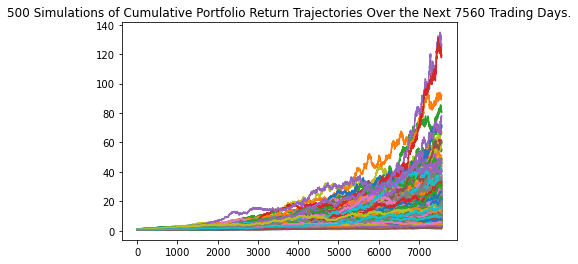

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
MC30_line_plot = MC_30years.plot_simulation() #Use plot_simulation() function


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

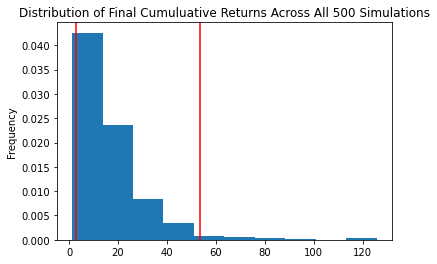

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
MC30_hist_plot = MC_30years.plot_distribution() #Use the plot_distribution() function


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
MC30_summary_stats = MC_30years.summarize_cumulative_return() #Use summarize_cumulative_return() function and assign to new variable


# Review the 30-year Monte Carlo summary statistics
print(MC30_summary_stats)

count           500.000000
mean             17.286801
std              14.796707
min               1.226425
25%               7.743856
50%              12.914793
75%              22.260689
max             125.727711
95% CI Lower      2.773391
95% CI Upper     53.386938
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}")


The current balance of the stock and bond portion of the portfolio is $65894.00


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# The 95% lower is at index [8] and the 95% upper is at index [9] in this case
ci_lower_thirty_cumulative_return = MC30_summary_stats[8] * total_stocks_bonds #Multiply the CI lower by the current stock/bond balance and assign to new variable
ci_upper_thirty_cumulative_return = MC30_summary_stats[9] * total_stocks_bonds #Multiply the CI upper by the current stock/bond balance and assign to new variable

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${total_stocks_bonds} will result within the range of ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.")


There is a 95% chance that an investment of $65894.0 will result within the range of $182749.83 and $3517878.89.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure the Monte Carlo simulation to forecast 10 years cumulative returns, using 4 parameters, and assign to new variable.
MC_10years = MCSimulation(
    portfolio_data=df_stock_data, # Want to be using data from df_stock_data
    weights=[.20, .80], # The weights should be split 20% to AGG and 80% to SPY
    num_simulation=500, # Run 500 samples
    num_trading_days= 252*10 # Number of trading days will be 252 multiplied by years (10 in this case)
)

# Review the simulation input data
MC_10years.portfolio_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-04-15 04:00:00+00:00  108.21  108.3000  108.21  108.25  2546204   
2019-04-16 04:00:00+00:00  108.12  108.2100  108.02  108.06  4093950   
2019-04-17 04:00:00+00:00  108.09  108.1899  108.05  108.05  3390171   
2019-04-18 04:00:00+00:00  108.23  108.2900  108.16  108.19  2217221   
2019-04-22 04:00:00+00:00  108.13  108.1600  108.05  108.06  5725616   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-15 04:00:00+00:00       10053  108.253507          NaN  290.27   
2019-04-16 04:00:00+00:00       12649  108.108731    -0.001755  290.96   
2019-04-17 04:00:00+00:00        9569  108.090758    -0.000093  291.41   
2019-04-18 04:00:00+00:00        8388  108.211849     0.001296  290.12   
2019-04-22 04:00:00+00:00        9161  108.098893    -0.001202  289.17   

                                                                           \
                              high      low   close    volume trade_count   
timestamp                                                                   
2019-04-15 04:00:00+00:00  290.350  289.075  289.97  50222730      199622   
2019-04-16 04:00:00+00:00  291.010  289.500  290.16  52154597      206469   
2019-04-17 04:00:00+00:00  291.425  288.990  289.45  58268470      245037   
2019-04-18 04:00:00+00:00  290.320  288.660  290.02  69414428      231296   
2019-04-22 04:00:00+00:00  290.435  289.070  290.27  40520264      170767   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-15 04:00:00+00:00  289.773677          NaN  
2019-04-16 04:00:00+00:00  290.277078     0.000655  
2019-04-17 04:00:00+00:00  289.770682    -0.002447  
2019-04-18 04:00:00+00:00  289.794161     0.001969  
2019-04-22 04:00:00+00:00  290.002934     0.000862

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return() #Use the calc_cumulative_return() function


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998983,1.018176,1.023719,1.009043,0.999136,0.997734,0.989804,0.989722,1.002260,1.005250,...,0.993183,0.997684,1.035195,1.018967,1.012136,0.987693,0.995204,1.002566,0.997673,0.976657
2,0.989968,1.029108,1.030652,1.017879,1.005711,0.992039,0.982623,0.987636,1.006378,0.994588,...,0.993957,0.994924,1.027568,1.016417,1.009732,0.991739,0.988626,1.006478,0.993830,0.969874
3,1.016805,1.042703,1.007358,1.010955,0.980482,0.997829,0.992818,0.979191,0.986852,0.980632,...,1.000605,1.024424,1.023626,1.026387,0.998111,1.006305,0.980801,1.037826,0.987093,0.988748
4,1.027653,1.045688,1.008840,1.007622,0.983374,0.999037,0.997991,0.976131,0.982132,0.983457,...,1.006810,1.034145,1.024372,1.026882,0.995391,1.002877,0.982420,1.052623,0.996548,0.979773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.045957,11.486183,5.496259,1.273565,2.336066,3.240617,9.207528,4.704605,3.148637,3.410913,...,2.575502,3.568244,6.215403,2.544471,2.004518,4.556292,1.703251,0.702505,4.891121,0.938885
2517,4.119254,11.474084,5.451519,1.281661,2.311638,3.241113,9.452031,4.657118,3.195364,3.358649,...,2.639294,3.537987,6.187740,2.509251,2.001601,4.654915,1.694859,0.714355,4.958393,0.939671
2518,4.244176,11.649167,5.519119,1.283895,2.322521,3.278187,9.478757,4.728932,3.149571,3.421469,...,2.652096,3.547095,6.208888,2.480472,2.019182,4.597408,1.705076,0.710822,4.931425,0.932737
2519,4.204230,11.626313,5.556401,1.275098,2.391925,3.232729,9.342088,4.633929,3.119832,3.451676,...,2.622523,3.595235,6.265935,2.504808,2.030205,4.615495,1.706385,0.709797,4.908301,0.922990


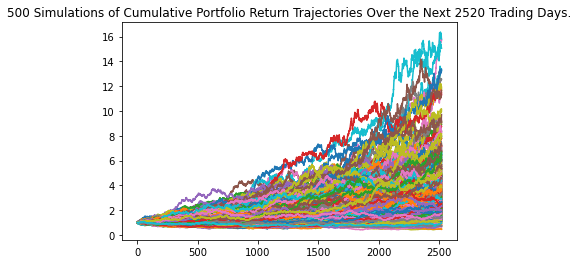

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
MC10_line_plot = MC_10years.plot_simulation() #Use the plot_simulation() function


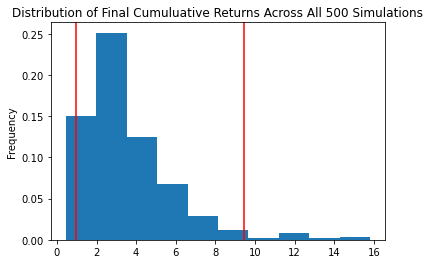

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
MC10_line_plot = MC_10years.plot_distribution() #Use the plot_distribution() function


In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results and save the results as a variable
MC10_summary_stats = MC_10years.summarize_cumulative_return() #Use the summarize_cumulative_return() function


# Review the 10-year Monte Carlo summary statistics
print(MC10_summary_stats)

count           500.000000
mean              3.587418
std               2.322346
min               0.445353
25%               2.032257
50%               3.018192
75%               4.560881
max              15.812473
95% CI Lower      0.947346
95% CI Upper      9.465685
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}")

The current balance of the stock and bond portion of the portfolio is $65894.00


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# The 95% lower is at index [8] and the 95% upper is at index [9] in this case
ci_lower_ten_cumulative_return = MC10_summary_stats[8] * total_stocks_bonds #Multiply the CI lower by the current stock/bond balance and assign to new variable
ci_upper_ten_cumulative_return = MC10_summary_stats[9] * total_stocks_bonds #Multiply the CI upper by the current stock/bond balance and assign to new variable

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${total_stocks_bonds} will result within the range of ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.")


There is a 95% chance that an investment of $65894.0 will result within the range of $62424.43 and $623731.83.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** 
It cannot be directly concluded whether or not weighing the portfolio more heavily on stocks will allow the members to retire in 10 years. From the financial analysis above, it shows that yes, putting more money into stocks will give the members greater return in a shorter timespan. However, there are many other factors that go into consideration when choosing to retire. It can depend on one's lifestyle, the financing of their other assets, family, etc. Also, choosing to invest in a riskier portfolio to retire earlier is a short-term plan and doesn't allow for consistent returns over a longer period of time. The members should be focused more on how to earn money throughout their retirement, not just how to earn enough money to retire. In conclusion, putting a heavier stock weight into the portfolio will give the members a better chance at quickly earning more money, but at the end of the day it is not the determining factor, and would not be the smarter decision.